# MNIST

In [ ]:
%pip install --upgrade pip
%pip install tensorflow==2.16.2 numpy matplotlib

## Python Modules

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random
import os

## Verify TensorFlow Version

In [12]:
assert tf.__version__.split(".")[0] == "2"
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")

TensorFlow version: 2.16.2
NumPy version: 1.26.4


## Loading MNIST Data

In [13]:
class MNISTDataLoader:
    """A class to load and prepare MNIST dataset."""

    def __init__(self):
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None

    def load_data(self):
        """Load MNIST dataset from Keras and preprocess."""
        (self.x_train, self.y_train), (self.x_test, self.y_test) = tf.keras.datasets.mnist.load_data()
        
        # Normalize pixel values to be between 0 and 1
        self.x_train = self.x_train.astype('float32') / 255
        self.x_test = self.x_test.astype('float32') / 255

        # Reshape images to (28, 28, 1)
        self.x_train = self.x_train.reshape(self.x_train.shape[0], 28, 28, 1)
        self.x_test = self.x_test.reshape(self.x_test.shape[0], 28, 28, 1)

        # One-hot encode the labels
        self.y_train = tf.keras.utils.to_categorical(self.y_train, 10)
        self.y_test = tf.keras.utils.to_categorical(self.y_test, 10)

    def print_shapes(self):
        """Print shapes of loaded and preprocessed data."""
        print(f"x_train shape: {self.x_train.shape}")
        print(f"y_train shape: {self.y_train.shape}")
        print(f"x_test shape: {self.x_test.shape}")
        print(f"y_test shape: {self.y_test.shape}")

# Create an instance and load data
mnist_loader = MNISTDataLoader()
mnist_loader.load_data()
mnist_loader.print_shapes()

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


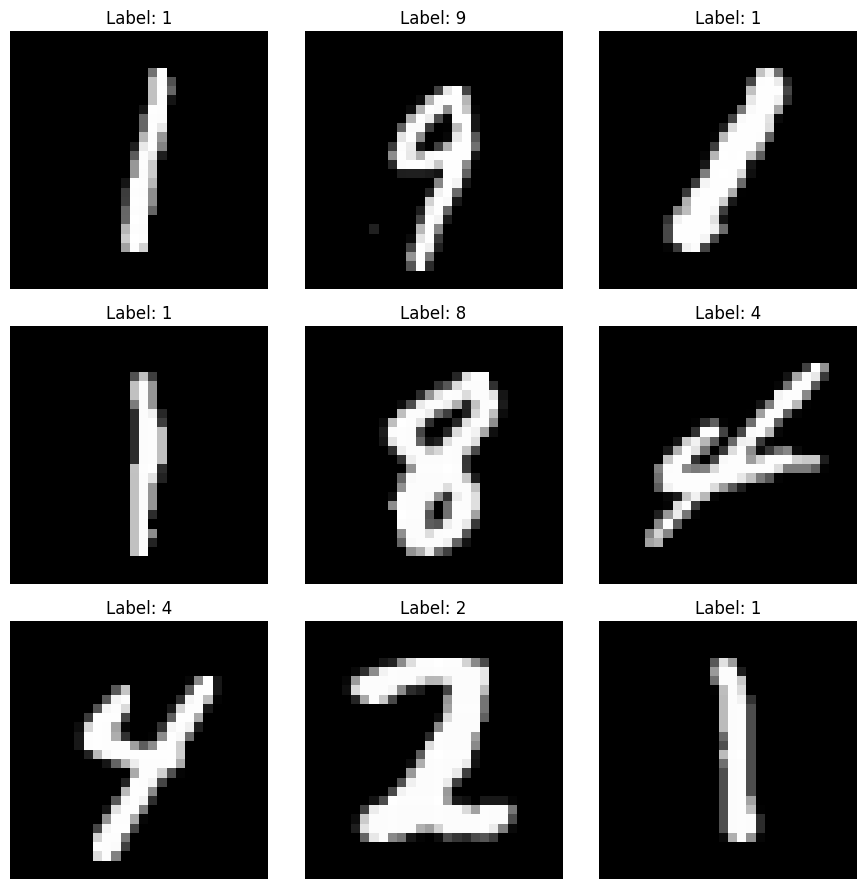

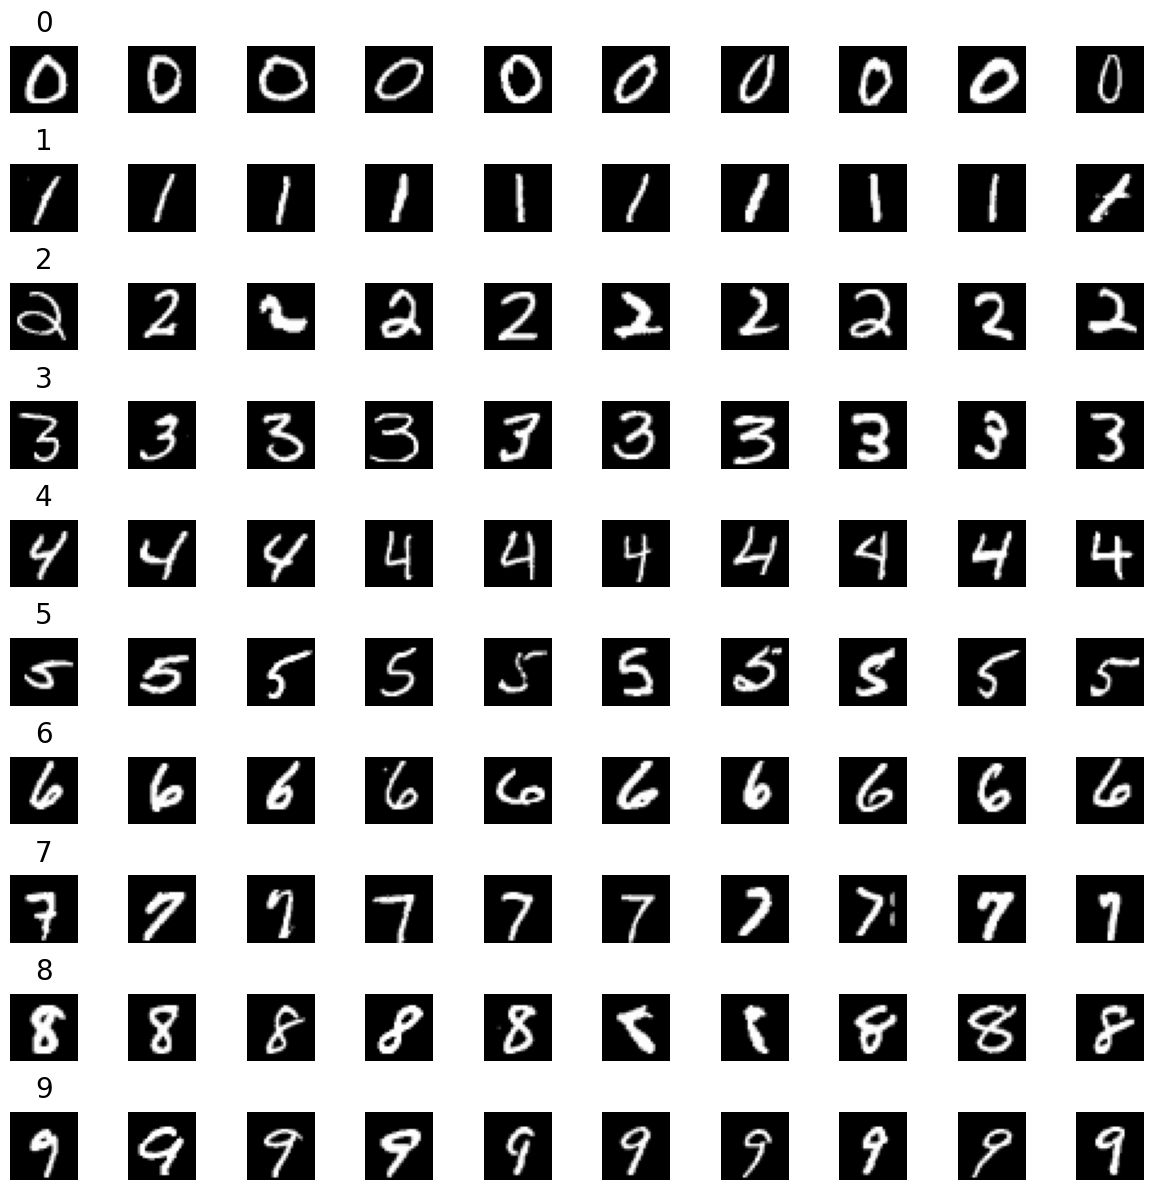

In [14]:
class MNISTVisualizer:
    """A class to visualize MNIST images."""
    
    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    
    def plot_random_samples(self, num_samples=9):
        """Plot random samples from the training set."""
        fig, axes = plt.subplots(3, 3, figsize=(9, 9))
        for i, ax in enumerate(axes.flat):
            num = random.randint(0, len(self.x_train) - 1)
            
            # Remove the channel dimension for plotting
            img = np.squeeze(self.x_train[num])
            
            ax.imshow(img, cmap="gray", interpolation=None)
            ax.set_title(f"Label: {np.argmax(self.y_train[num])}")
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()
    
    def plot_sample_grid(self, grid_size=10):
        """Plot a grid of samples, one for each digit."""
        fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
        for digit in range(10):
            digit_indices = np.where(np.argmax(self.y_train, axis=1) == digit)[0]
            for i in range(grid_size):
                ax = axes[digit, i]
                idx = random.choice(digit_indices)
                img = np.squeeze(self.x_train[idx])
                ax.imshow(img, cmap="gray", interpolation=None)
                ax.axis('off')
                if i == 0:
                    ax.set_title(f"{digit}", fontsize=20, pad=10)
        
        plt.tight_layout()
        plt.show()

# Create an instance and plot random samples
mnist_viz = MNISTVisualizer(mnist_loader.x_train, mnist_loader.y_train)
mnist_viz.plot_random_samples()

# Plot a grid of samples
mnist_viz.plot_sample_grid()

## Create Model

In [15]:
class MNISTModel:
    """A class to create and manage the MNIST model."""
    
    def __init__(self):
        self.model = None
    
    def create_model(self):
        """Create a CNN model for MNIST classification."""
        self.model = Sequential([
            Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(10, activation='softmax')
        ])
        
        self.model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
    
    def summary(self):
        """Print model summary."""
        self.model.summary()
    
    def get_model(self):
        """Return the model."""
        return self.model

# Create an instance, build the model, and print summary
mnist_model = MNISTModel()
mnist_model.create_model()
mnist_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Setup Training & Test Data for Model

In [16]:
class MNISTDataPreprocessor:
    """A class to preprocess and augment MNIST data for the model."""
    
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.datagen = None
    
    def preprocess(self):
        """Perform additional preprocessing and setup data augmentation."""
        # Ensure data is in the correct shape (28, 28, 1)
        if self.x_train.shape[-1] != 1:
            self.x_train = self.x_train.reshape(-1, 28, 28, 1)
            self.x_test = self.x_test.reshape(-1, 28, 28, 1)
        
        # Ensure labels are one-hot encoded
        if len(self.y_train.shape) == 1:
            self.y_train = tf.keras.utils.to_categorical(self.y_train, 10)
            self.y_test = tf.keras.utils.to_categorical(self.y_test, 10)
        
        # Setup data augmentation
        self.datagen = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.1,
            width_shift_range=0.1,
            height_shift_range=0.1
        )
        self.datagen.fit(self.x_train)
    
    def get_augmented_data(self):
        """Get a data generator for augmented training data."""
        return self.datagen.flow(self.x_train, self.y_train, batch_size=32)
    
    def print_shapes(self):
        """Print shapes of preprocessed data."""
        print(f"x_train shape: {self.x_train.shape}")
        print(f"y_train shape: {self.y_train.shape}")
        print(f"x_test shape: {self.x_test.shape}")
        print(f"y_test shape: {self.y_test.shape}")
    
    def get_data(self):
        """Return preprocessed data."""
        return self.x_train, self.y_train, self.x_test, self.y_test

# Create an instance, preprocess data, and print shapes
mnist_preprocessor = MNISTDataPreprocessor(mnist_loader.x_train, mnist_loader.y_train,
                                           mnist_loader.x_test, mnist_loader.y_test)
mnist_preprocessor.preprocess()
mnist_preprocessor.print_shapes()

# Example of getting augmented data
augmented_data = mnist_preprocessor.get_augmented_data()

# Example of getting preprocessed data
x_train, y_train, x_test, y_test = mnist_preprocessor.get_data()

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


## Train and Save Model

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.7835 - loss: 0.6761 - val_accuracy: 0.9763 - val_loss: 0.0733
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 103ms/step - accuracy: 0.9655 - loss: 0.1162 - val_accuracy: 0.9862 - val_loss: 0.0473
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 76ms/step - accuracy: 0.9748 - loss: 0.0823 - val_accuracy: 0.9882 - val_loss: 0.0392
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.9808 - loss: 0.0615 - val_accuracy: 0.9877 - val_loss: 0.0424
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.9848 - loss: 0.0521 - val_accuracy: 0.9895 - val_loss: 0.0372
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 65s 120ms/step - accuracy: 0.9868 - loss: 0.0446 - val_accuracy: 0.9908 - val_loss: 0.0322
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.9891 - loss: 0.0371 - val_accuracy: 0.9905 - val_loss: 0.0344
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.9892 - loss: 0.0347 

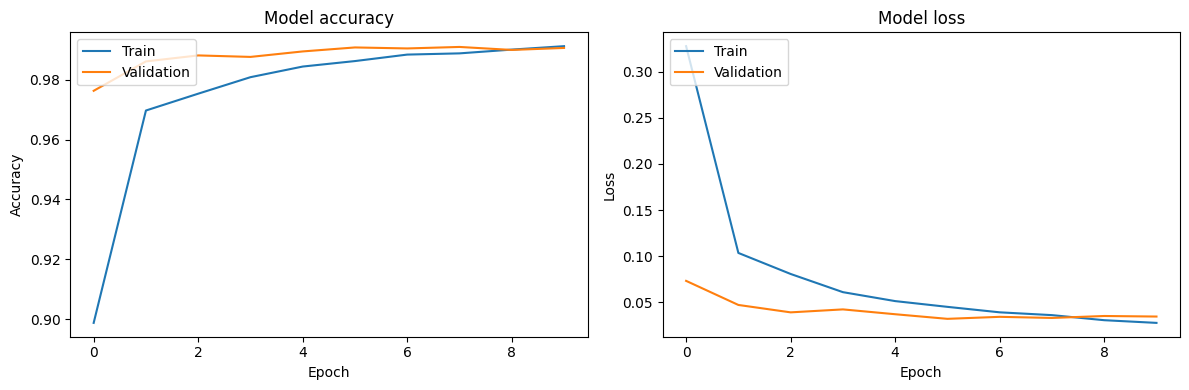

In [9]:
class MNISTModelTrainer:
    """A class to train and evaluate the MNIST model."""
    
    def __init__(self, model, x_train, y_train, x_test, y_test):
        self.model = model
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.history = None
    
    def train(self, batch_size=128, epochs=5):
        """Train the model."""
        self.history = self.model.fit(
            self.x_train, self.y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.1,
            verbose=1
        )
        return self.history
    
    def evaluate(self):
        """Evaluate the model on test data."""
        results = self.model.evaluate(self.x_test, self.y_test, verbose=2)
        print(f"Test Loss: {results[0]:.4f}")
        print(f"Test Accuracy: {results[1]:.4f}")
    
    def save_model(self, filename="mnist_model"):
        """Save the trained model."""
        # Save in the newer .keras format
        self.model.save(f"{filename}.keras")
        print(f"Model saved as {filename}.keras")
    
    def plot_training_history(self):
        """Plot the training and validation accuracy/loss."""
        if self.history is None:
            print("Model hasn't been trained yet. Please train the model first.")
            return
        
        plt.figure(figsize=(12, 4))
        
        # Plot training & validation accuracy values
        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        
        # Plot training & validation loss values
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        
        plt.tight_layout()
        plt.show()

mnist_trainer = MNISTModelTrainer(
    mnist_model.get_model(),
    mnist_preprocessor.x_train,
    mnist_preprocessor.y_train,
    mnist_preprocessor.x_test,
    mnist_preprocessor.y_test
)

# Train the model
history = mnist_trainer.train(epochs=10)

# Evaluate the model
mnist_trainer.evaluate()

# Save the model
mnist_trainer.save_model()

# Plot training history
mnist_trainer.plot_training_history()